<a href="https://colab.research.google.com/github/Royalrival/Machine_learning_project/blob/main/FlightDelay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

pd.set_option("display.max_columns", 500)
plt.style.use("seaborn-colorblind")
pal = sns.color_palette()

<ipython-input-3-b680f444d1b3>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-colorblind")


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd

link = f'https://drive.google.com/uc?id=1StfOm_hCyVhyrvRhUCH5npVDY63hg766'
df = pd.read_csv(link)

In [6]:
df

,Unnamed: 0.1,Unnamed: 0,FlightDate,Airline,Flight_Number_Marketing_Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,OriginAirportID,OriginCityName,OriginStateName,DestAirportID,DestCityName,DestStateName,TaxiOut,TaxiIn,CRSArrTime,ArrTime,ArrDelayMinutes
0,0,0,4/4/2022,"Commutair Aka Champlain Enterprises, Inc.",4301,GJT,DEN,False,False,1133,1123.0,0.0,11921,"Grand Junction, CO",Colorado,11292,"Denver, CO",Colorado,17.0,8.0,1245,1228.0,0.0
1,64,64,4/4/2022,"GoJet Airlines, LLC d/b/a United Express",4183,DCA,EWR,False,False,1600,1600.0,0.0,11278,"Washington, DC",Virginia,11618,"Newark, NJ",New Jersey,18.0,7.0,1744,1702.0,0.0
2,128,128,4/4/2022,Air Wisconsin Airlines Corp,3908,ORD,TVC,False,False,1820,1810.0,0.0,13930,"Chicago, IL",Illinois,15380,"Traverse City, MI",Michigan,13.0,3.0,2034,2012.0,0.0
3,192,192,4/4/2022,Air Wisconsin Airlines Corp,3812,CID,ORD,False,False,1110,1103.0,0.0,11003,"Cedar Rapids/Iowa City, IA",Iowa,13930,"Chicago, IL",Illinois,9.0,10.0,1234,1204.0,0.0
4,256,256,4/4/2022,Air Wisconsin Airlines Corp,3744,ORD,SGF,False,False,851,856.0,5.0,13930,"Chicago, IL",Illinois,14783,"Springfield, MO",Missouri,21.0,6.0,1039,1038.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456148,29193472,29193472,1/10/2019,ExpressJet Airlines Inc.,4241,DCA,EWR,False,False,750,743.0,0.0,11278,"Washington, DC",Virginia,11618,"Newark, NJ",New Jersey,15.0,8.0,909,852.0,0.0
456149,29193536,29193536,1/11/2019,ExpressJet Airlines Inc.,4242,IAH,STL,True,False,1829,NaN,NaN,12266,"Houston, TX",Texas,15016,"St. Louis, MO",Missouri,NaN,NaN,2035,NaN,NaN
456150,29193600,29193600,1/4/2019,ExpressJet Airlines Inc.,4245,ORD,BNA,False,False,1530,1527.0,0.0,13930,"Chicago, IL",Illinois,10693,"Nashville, TN",Tennessee,16.0,18.0,1712,1701.0,0.0
456151,29193664,29193664,1/18/2019,ExpressJet Airlines Inc.,4247,ORD,DSM,False,False,1010,1059.0,49.0,13930,"Chicago, IL",Illinois,11423,"Des Moines, IA",Iowa,18.0,4.0,1138,1218.0,40.0


In [7]:
df.head()

,Unnamed: 0.1,Unnamed: 0,FlightDate,Airline,Flight_Number_Marketing_Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,OriginAirportID,OriginCityName,OriginStateName,DestAirportID,DestCityName,DestStateName,TaxiOut,TaxiIn,CRSArrTime,ArrTime,ArrDelayMinutes
0,0,0,4/4/2022,"Commutair Aka Champlain Enterprises, Inc.",4301,GJT,DEN,False,False,1133,1123.0,0.0,11921,"Grand Junction, CO",Colorado,11292,"Denver, CO",Colorado,17.0,8.0,1245,1228.0,0.0
1,64,64,4/4/2022,"GoJet Airlines, LLC d/b/a United Express",4183,DCA,EWR,False,False,1600,1600.0,0.0,11278,"Washington, DC",Virginia,11618,"Newark, NJ",New Jersey,18.0,7.0,1744,1702.0,0.0
2,128,128,4/4/2022,Air Wisconsin Airlines Corp,3908,ORD,TVC,False,False,1820,1810.0,0.0,13930,"Chicago, IL",Illinois,15380,"Traverse City, MI",Michigan,13.0,3.0,2034,2012.0,0.0
3,192,192,4/4/2022,Air Wisconsin Airlines Corp,3812,CID,ORD,False,False,1110,1103.0,0.0,11003,"Cedar Rapids/Iowa City, IA",Iowa,13930,"Chicago, IL",Illinois,9.0,10.0,1234,1204.0,0.0
4,256,256,4/4/2022,Air Wisconsin Airlines Corp,3744,ORD,SGF,False,False,851,856.0,5.0,13930,"Chicago, IL",Illinois,14783,"Springfield, MO",Missouri,21.0,6.0,1039,1038.0,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456153 entries, 0 to 456152
Data columns (total 23 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0.1                     456153 non-null  int64  
 1   Unnamed: 0                       456153 non-null  int64  
 2   FlightDate                       456153 non-null  object 
 3   Airline                          456153 non-null  object 
 4   Flight_Number_Marketing_Airline  456153 non-null  int64  
 5   Origin                           456153 non-null  object 
 6   Dest                             456153 non-null  object 
 7   Cancelled                        456153 non-null  bool   
 8   Diverted                         456153 non-null  bool   
 9   CRSDepTime                       456153 non-null  int64  
 10  DepTime                          444190 non-null  float64
 11  DepDelayMinutes                  444164 non-null  float64
 12  Or

In [9]:
df['FlightDate']=pd.to_datetime(df['FlightDate'])

In [10]:
vis1=df.query("DepDelayMinutes < 30")["DepDelayMinutes"]
vis1

0         0.0
1         0.0
2         0.0
3         0.0
4         5.0
         ... 
456146    0.0
456147    0.0
456148    0.0
456150    0.0
456152    0.0
Name: DepDelayMinutes, Length: 394473, dtype: float64

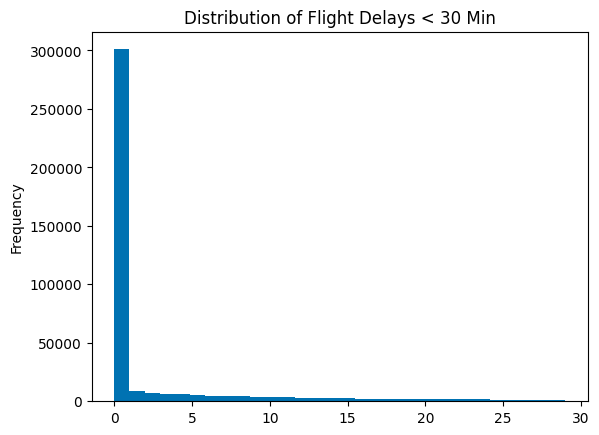

In [11]:
vis1=df.query("DepDelayMinutes < 30")["DepDelayMinutes"]
vis1.plot(
    kind="hist", bins=30, title="Distribution of Flight Delays < 30 Min"
)
plt.show()

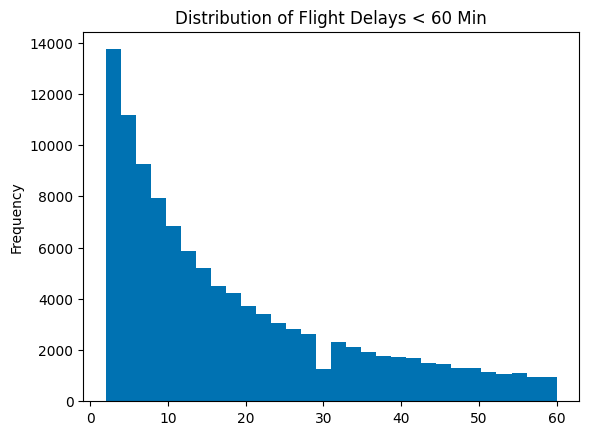

In [12]:
vis2=df.query("DepDelayMinutes > 1 and DepDelayMinutes < 61")["DepDelayMinutes"]
vis2.plot(
    kind="hist", bins=30, title="Distribution of Flight Delays < 60 Min"
)
plt.show()

In [13]:
df["DelayGroup"] = None
#New column made
df.loc[df["DepDelayMinutes"] <= 1, "DelayGroup"] = "OnTime_Early" #loc find location of row and assigns value of OnTime_Early to Delay Group
df.loc[
    (df["DepDelayMinutes"] > 1) & (df["DepDelayMinutes"] <= 15), "DelayGroup"
] = "Small_Delay"
df.loc[
    (df["DepDelayMinutes"] > 15) & (df["DepDelayMinutes"] <= 45), "DelayGroup"
] = "Medium_Delay"
df.loc[df["DepDelayMinutes"] > 45, "DelayGroup"] = "Large_Delay"
df.loc[df["Cancelled"], "DelayGroup"] = "Cancelled" #it works like wile(true) loop and sets all the values whch are cancelled as Cancelled

In [14]:
vis3=df["DelayGroup"].value_counts(ascending=True)
vis3

Cancelled        12232
Large_Delay      34533
Medium_Delay     39368
Small_Delay      60031
OnTime_Early    309974
Name: DelayGroup, dtype: int64

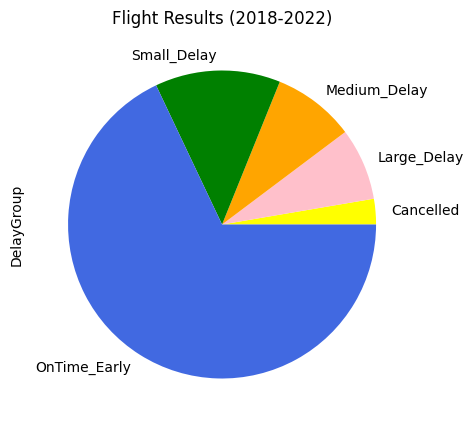

In [15]:
vis3=df["DelayGroup"].value_counts(ascending=True)
vis3.plot(
    kind="pie", figsize=(10, 5), title="Flight Results (2018-2022)",colors=["yellow", "pink", "orange", "green", "royalblue"]
)
plt.show()

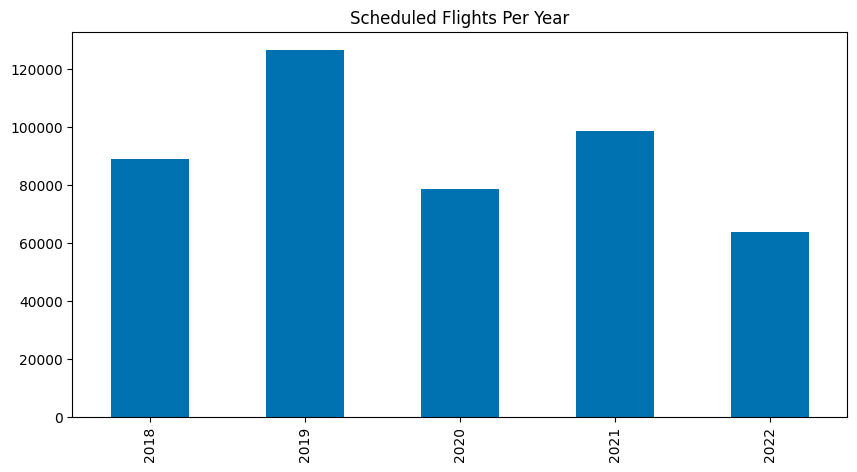

In [16]:
df["Year"] = df['FlightDate'].dt.year #Extracting years
df["Year"].value_counts().sort_index().plot(
    kind="bar", figsize=(10, 5), title="Scheduled Flights Per Year"
)
plt.show()

In [17]:
df["Year"] = df["FlightDate"].dt.year
df_agg = df.groupby("Year")["DelayGroup"].value_counts(normalize=True).unstack() * 100 #groupby_Grouping by year, value_counts:normalizes the value, unstack makes it gradiented
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]
df_agg[col_order].style.background_gradient(cmap="Greens")

DelayGroup,OnTime_Early,Small_Delay,Medium_Delay,Large_Delay,Cancelled
Year,,,,,
2018,66.290896,14.262409,9.522524,8.319833,1.604338
2019,66.635029,13.612060,9.076025,8.731967,1.944919
2020,77.619624,8.187321,4.518637,3.696719,5.977700
2021,68.027742,13.921702,9.003985,7.258956,1.787615
2022,60.889147,15.675413,10.989580,9.475237,2.970623


In [18]:
df["Month"] = df["FlightDate"].dt.month
df_agg = df.groupby("Month")["DelayGroup"].value_counts(normalize=True).unstack() * 100
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]
df_agg[col_order].style.background_gradient(cmap="Blues")

DelayGroup,OnTime_Early,Small_Delay,Medium_Delay,Large_Delay,Cancelled
Month,,,,,
1,70.024657,12.070274,7.833468,7.036844,3.034757
2,66.714898,13.175353,9.077507,7.879003,3.153239
3,68.422620,11.990106,7.739172,6.209203,5.638900
4,66.649005,12.179245,7.741024,6.721671,6.709056
5,66.868270,14.309349,9.061322,7.800168,1.960891
6,61.717905,15.033646,10.885341,10.492149,1.870959
7,64.072796,14.421316,9.925062,9.820388,1.760438
8,66.801492,13.012048,9.041882,8.961561,2.183018
9,74.878458,11.228151,6.609561,5.813752,1.470078


In [19]:
df["Month"] = df["FlightDate"].dt.month
df_agg = (
    df.query("Year != 2020") #Query is used for making a condition sort of
    .groupby("Month")["DelayGroup"]
    .value_counts(normalize=True)
    .unstack()
    * 100
)
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]
df_agg[col_order].style.background_gradient(cmap="Blues")

DelayGroup,OnTime_Early,Small_Delay,Medium_Delay,Large_Delay,Cancelled
Month,,,,,
1,69.096274,11.934583,8.051606,7.345324,3.572213
2,64.295542,13.795411,9.764623,8.266092,3.878333
3,68.195578,13.732685,8.999174,7.192001,1.880561
4,68.546304,13.625678,8.654265,7.513713,1.660040
5,65.374280,15.083419,9.638270,8.341946,1.562085
6,59.099684,15.786241,11.700012,11.389961,2.024102
7,60.607064,15.711921,10.885762,10.894040,1.901214
8,62.747084,14.262765,10.253545,10.295453,2.441154
9,72.641542,11.981756,7.383149,6.433250,1.560303


In [20]:
df["Month"] = df["FlightDate"].dt.month
df_agg = (
    df.query("3 <= Month <= 4")
    .groupby("Year")["DelayGroup"]
    .value_counts(normalize=True)
    .unstack()
    * 100
)
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]
df_agg[col_order].style.background_gradient(cmap="Oranges", axis=0)

DelayGroup,OnTime_Early,Small_Delay,Medium_Delay,Large_Delay,Cancelled
Year,,,,,
2018,66.471042,14.610039,9.722008,7.382239,1.814672
2019,68.066950,13.323904,8.359264,8.052805,2.197077
2020,64.261807,5.429528,3.235403,2.689971,24.383290
2021,78.605916,10.962258,5.691942,3.801428,0.938456
2022,61.858431,15.610823,11.238043,9.390544,1.902159


<Figure size 2000x2000 with 0 Axes>

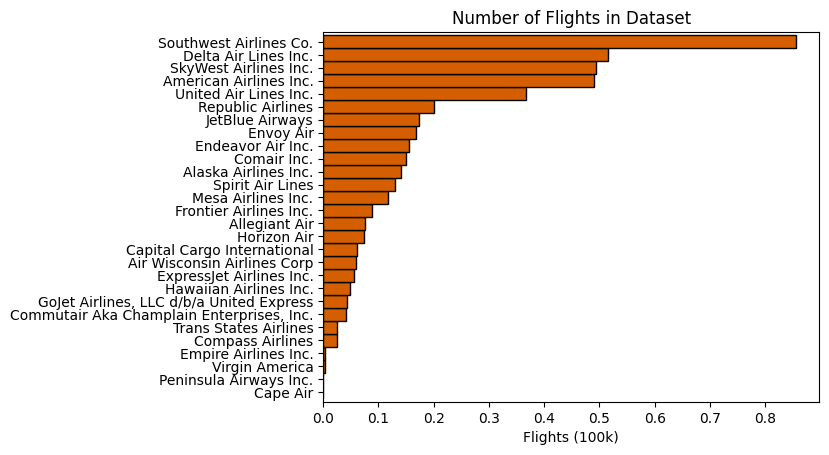

<Figure size 2000x2000 with 0 Axes>

In [21]:
airlines_ordered = (df["Airline"].value_counts(ascending=True) / 100000).plot(
    kind="barh", color=pal[2], width=1, edgecolor="black"
)
plt.title("Number of Flights in Dataset")
plt.xlabel("Flights (100k)")
plt.figure(figsize=(20,20))

In [22]:
df["Airline"].value_counts().reset_index().query("Airline > 10000")["index"].values.tolist()

['Southwest Airlines Co.',
 'Delta Air Lines Inc.',
 'SkyWest Airlines Inc.',
 'American Airlines Inc.',
 'United Air Lines Inc.',
 'Republic Airlines',
 'JetBlue Airways',
 'Envoy Air',
 'Endeavor Air Inc.',
 'Comair Inc.',
 'Alaska Airlines Inc.',
 'Spirit Air Lines',
 'Mesa Airlines Inc.']

In [23]:
top_airlines = (
    df["Airline"]
    .value_counts()
    .reset_index()
    .query("Airline > 10000")["index"]
    .values.tolist()
)

df_top = df.loc[df["Airline"].isin(top_airlines)].reset_index(drop=True).copy()

In [24]:
# Reset airline categories
df_top["Airline"] = df_top["Airline"].astype("str").astype("category")

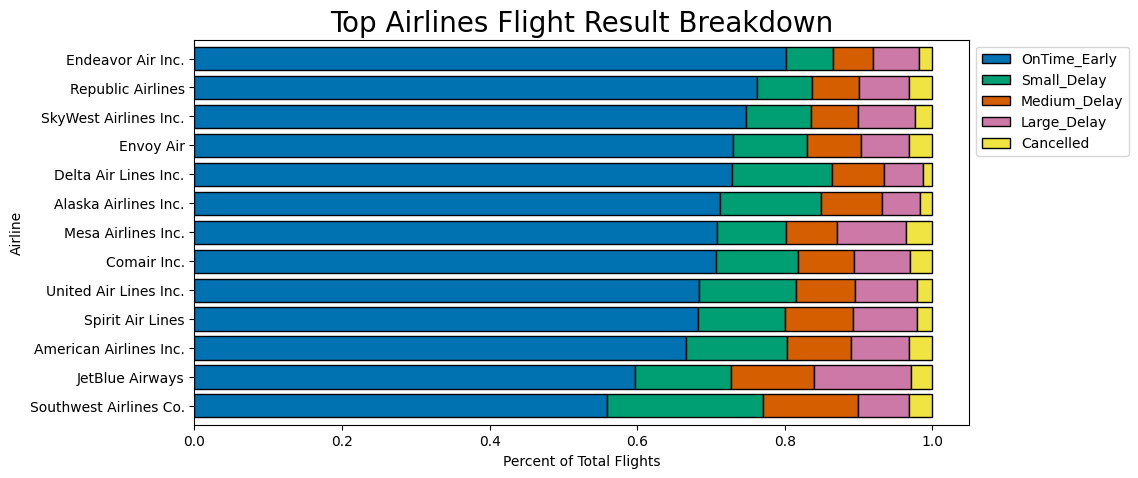

In [25]:
col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]

df_agg = (
    df_top.groupby(["Airline"])["DelayGroup"]
    .value_counts(normalize=True)
    .unstack()[col_order]
)

fig, ax = plt.subplots(figsize=(10, 5))
df_agg.sort_values("OnTime_Early").plot(
    kind="barh", stacked=True, ax=ax, width=0.8, edgecolor="black"
)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Top Airlines Flight Result Breakdown", fontsize=20)
ax.set_xlabel("Percent of Total Flights")
plt.show()

In [26]:
delay_mapping = {
    "OnTime_Early": "Good",
    "Small_Delay": "Good",
    "Medium_Delay": "Bad",
    "Large_Delay": "Bad",
    "Cancelled": "Bad",
}

In [27]:
df_top["DelayOk"] = df_top["DelayGroup"].map(delay_mapping)

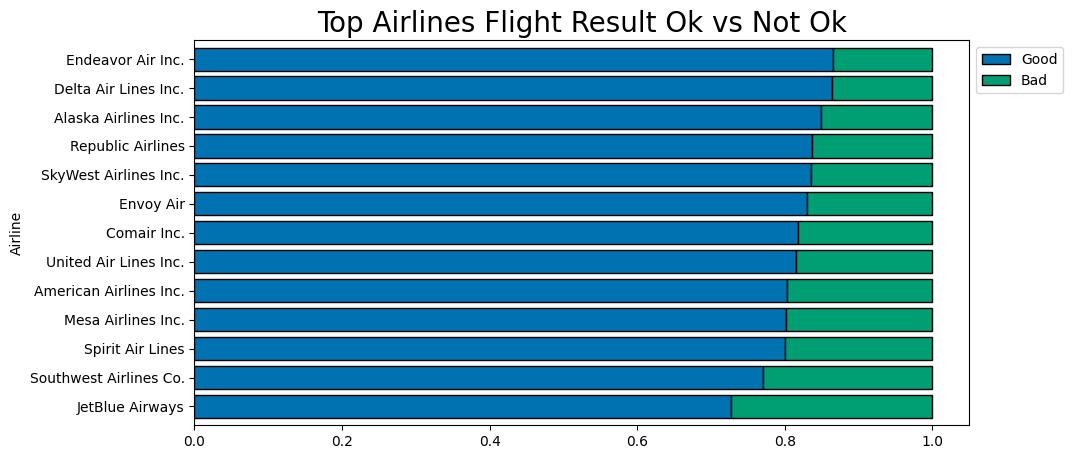

In [28]:
df_agg = (
    df_top.groupby(["Airline"])["DelayOk"]
    .value_counts(normalize=True)
    .unstack()[["Good", "Bad"]]
)

fig, ax = plt.subplots(figsize=(10, 5))
df_agg.sort_values("Good").plot(
    kind="barh", stacked=True, ax=ax, width=0.8, edgecolor="black"
)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Top Airlines Flight Result Ok vs Not Ok", fontsize=20)

plt.show()

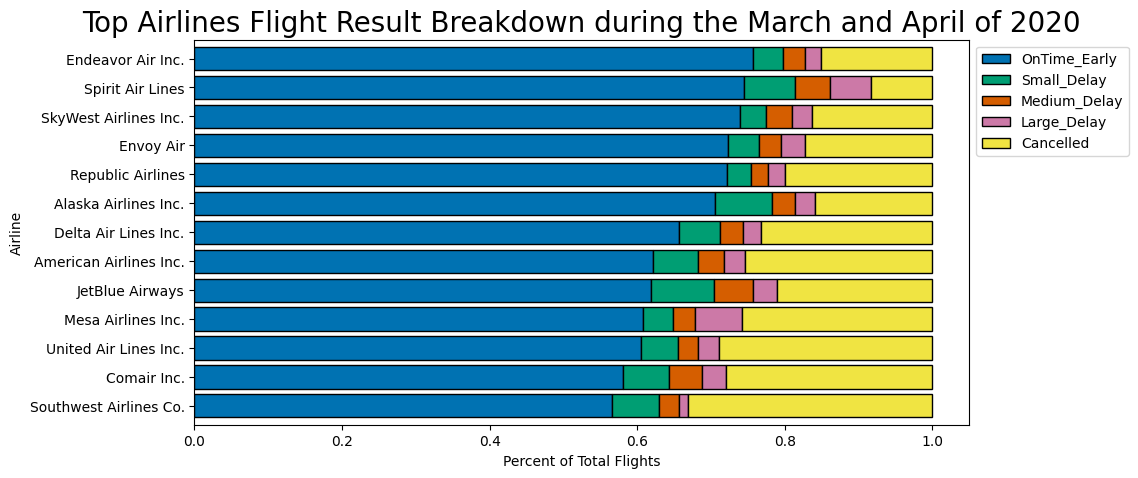

In [29]:
df_v=df_top[df_top['Year']==2020]
df_vizz=df_v.query("3 <= Month <= 4")

col_order = ["OnTime_Early", "Small_Delay", "Medium_Delay", "Large_Delay", "Cancelled"]

df_agg = (
    df_vizz.groupby(["Airline"])["DelayGroup"]
    .value_counts(normalize=True)
    .unstack()[col_order]
)

fig, ax = plt.subplots(figsize=(10, 5))
df_agg.sort_values("OnTime_Early").plot(
    kind="barh", stacked=True, ax=ax, width=0.8, edgecolor="black"
)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Top Airlines Flight Result Breakdown during the March and April of 2020", fontsize=20)
ax.set_xlabel("Percent of Total Flights")
plt.show()

In [30]:
city_counts = df['OriginCityName'].value_counts().reset_index()
city_counts.columns = ['OriginCityName', 'Count']

city_counts

,OriginCityName,Count
0,"Chicago, IL",26631
1,"Atlanta, GA",21392
2,"Denver, CO",18182
3,"Dallas/Fort Worth, TX",17217
4,"New York, NY",14967
...,...,...
375,"Bishop, CA",4
376,"Wilmington, DE",3
377,"Rota, TT",1
378,"Cold Bay, AK",1


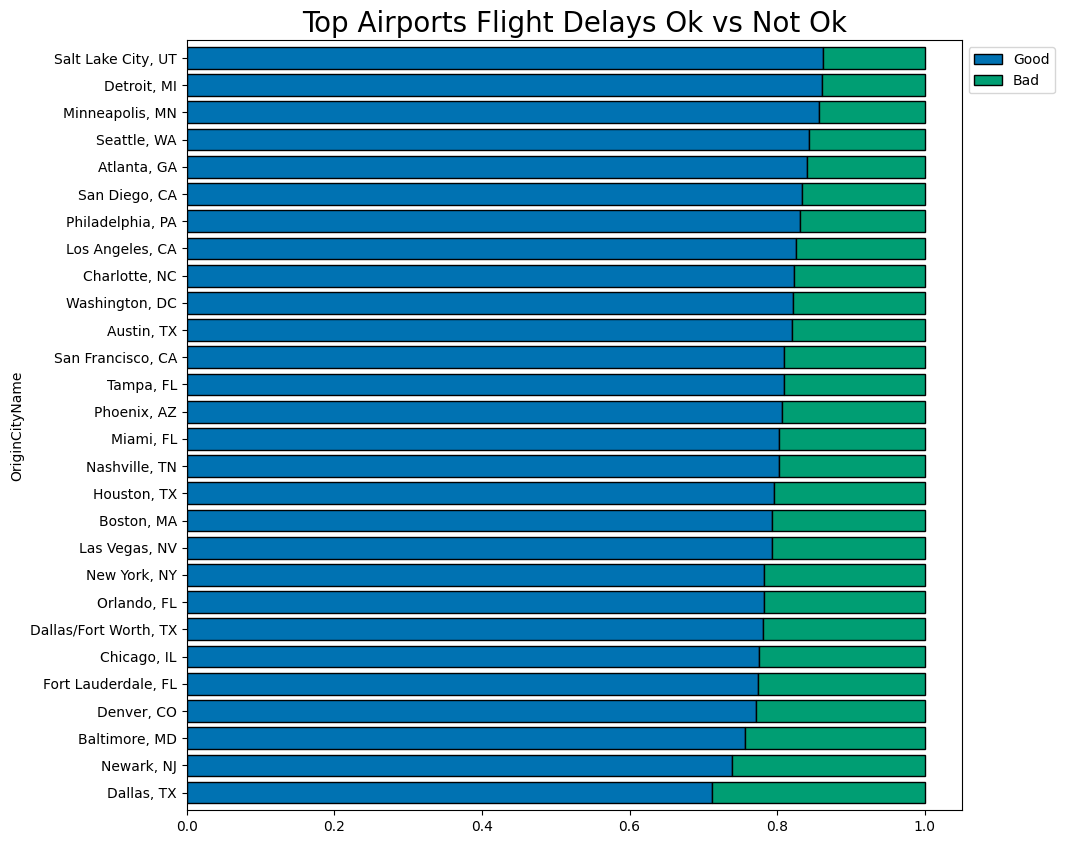

In [31]:
city_counts = df_top['OriginCityName'].value_counts().reset_index()
city_counts.columns = ['OriginCityName', 'Count']

df_new=pd.merge(df_top, city_counts, on='OriginCityName')


df_agg = (
    df_new.query("Count>=4000")
    .groupby(["OriginCityName"])["DelayOk"]
    .value_counts(normalize=True)
    .unstack()[["Good", "Bad"]]
)

fig, ax = plt.subplots(figsize=(10, 10))
df_agg.sort_values("Good").plot(
    kind="barh", stacked=True, ax=ax, width=0.8, edgecolor="black"
)
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title("Top Airports Flight Delays Ok vs Not Ok", fontsize=20)

plt.show()

In [32]:
df["DelayOk"] = df["DelayGroup"].map(delay_mapping)

In [33]:
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder() #object-creation
df['Airline']=le1.fit_transform(df['Airline'])

In [34]:
from sklearn.preprocessing import LabelEncoder
le2=LabelEncoder()
df['Origin']=le2.fit_transform(df['Origin'])

In [35]:
from sklearn.preprocessing import LabelEncoder
le3=LabelEncoder()
df['Dest']=le3.fit_transform(df['Dest'])

In [36]:
from sklearn.preprocessing import LabelEncoder
le4=LabelEncoder()
df['Cancelled']=le4.fit_transform(df['Cancelled'])

In [37]:
from sklearn.preprocessing import LabelEncoder
le5=LabelEncoder()
df['Diverted']=le5.fit_transform(df['Diverted'])

In [38]:
from sklearn.preprocessing import LabelEncoder
le6=LabelEncoder()
df['OriginCityName']=le6.fit_transform(df['OriginCityName'])

In [39]:
from sklearn.preprocessing import LabelEncoder
le7=LabelEncoder()
df['DestCityName']=le7.fit_transform(df['DestCityName'])

In [40]:
from sklearn.preprocessing import LabelEncoder
le8=LabelEncoder()
df['OriginStateName']=le8.fit_transform(df['OriginStateName'])

In [41]:
from sklearn.preprocessing import LabelEncoder
le9=LabelEncoder()
df['DestStateName']=le9.fit_transform(df['DestStateName'])

In [42]:
from sklearn.preprocessing import LabelEncoder
le10=LabelEncoder()
df['DelayGroup']=le10.fit_transform(df['DelayGroup'])

In [43]:
from sklearn.preprocessing import LabelEncoder
le11=LabelEncoder()
df['DelayOk']=le11.fit_transform(df['DelayOk'])

In [44]:
df.isnull().sum()

Unnamed: 0.1                           0
Unnamed: 0                             0
FlightDate                             0
Airline                                0
Flight_Number_Marketing_Airline        0
Origin                                 0
Dest                                   0
Cancelled                              0
Diverted                               0
CRSDepTime                             0
DepTime                            11963
DepDelayMinutes                    11989
OriginAirportID                        0
OriginCityName                         0
OriginStateName                        0
DestAirportID                          0
DestCityName                           0
DestStateName                          0
TaxiOut                            12279
TaxiIn                             12479
CRSArrTime                             0
ArrTime                            12367
ArrDelayMinutes                    13282
DelayGroup                             0
Year            

In [45]:
df.dropna(inplace=True)

In [46]:
df.head()

,Unnamed: 0.1,Unnamed: 0,FlightDate,Airline,Flight_Number_Marketing_Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,OriginAirportID,OriginCityName,OriginStateName,DestAirportID,DestCityName,DestStateName,TaxiOut,TaxiIn,CRSArrTime,ArrTime,ArrDelayMinutes,DelayGroup,Year,Month,DelayOk
0,0,0,2022-04-04,7,4301,144,98,0,0,1133,1123.0,0.0,11921,129,5,11292,89,5,17.0,8.0,1245,1228.0,0.0,3,2022,4,1
1,64,64,2022-04-04,15,4183,96,123,0,0,1600,1600.0,0.0,11278,361,48,11618,243,29,18.0,7.0,1744,1702.0,0.0,3,2022,4,1
2,128,128,2022-04-04,0,3908,265,368,0,0,1820,1810.0,0.0,13930,65,12,15380,348,21,13.0,3.0,2034,2012.0,0.0,3,2022,4,1
3,192,192,2022-04-04,0,3812,72,264,0,0,1110,1103.0,0.0,11003,56,14,13930,65,12,9.0,10.0,1234,1204.0,0.0,3,2022,4,1
4,256,256,2022-04-04,0,3744,265,332,0,0,851,856.0,5.0,13930,65,12,14783,333,24,21.0,6.0,1039,1038.0,0.0,4,2022,4,1


In [47]:
X=df.iloc[:,2:-1]
X.drop(['FlightDate','DelayGroup','DepTime','DepDelayMinutes','ArrTime','ArrDelayMinutes','TaxiIn','TaxiOut','Cancelled','Diverted','Flight_Number_Marketing_Airline','OriginAirportID','DestAirportID'],axis=1,inplace=True)
y=df.iloc[:,-1:]

In [48]:
X

,Airline,Origin,Dest,CRSDepTime,OriginCityName,OriginStateName,DestCityName,DestStateName,CRSArrTime,Year,Month
0,7,144,98,1133,129,5,89,5,1245,2022,4
1,15,96,123,1600,361,48,243,29,1744,2022,4
2,0,265,368,1820,65,12,348,21,2034,2022,4
3,0,72,264,1110,56,14,65,12,1234,2022,4
4,0,265,332,851,65,12,333,24,1039,2022,4
...,...,...,...,...,...,...,...,...,...,...,...
456147,13,265,83,1937,65,12,74,24,2109,2019,1
456148,13,96,123,750,361,48,243,29,909,2019,1
456150,13,265,46,1530,65,12,238,42,1712,2019,1
456151,13,265,106,1010,65,12,90,14,1138,2019,1


In [49]:
y

,DelayOk
0,1
1,1
2,1
3,1
4,1
...,...
456147,1
456148,1
456150,1
456151,0


In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [51]:
y_train

,DelayOk
129727,1
239039,1
323532,1
22743,1
168587,0
...,...
156276,1
452413,1
121024,1
448980,0


In [52]:
from sklearn.tree import DecisionTreeClassifier
classifier2=DecisionTreeClassifier(max_depth=20)
classifier2.fit(X_train,y_train)

y_pred = classifier2.predict(X_test)

In [53]:
pd.Series(y_pred).value_counts()

1    97642
0    13044
dtype: int64

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.26      0.19      0.22     18411
           1       0.85      0.90      0.87     92275

    accuracy                           0.78    110686
   macro avg       0.55      0.54      0.54    110686
weighted avg       0.75      0.78      0.76    110686



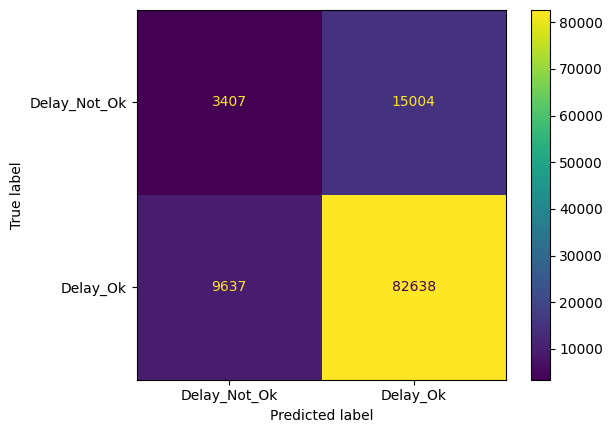

In [55]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Delay_Not_Ok', 'Delay_Ok'])

cm_display.plot()
plt.show()

In [56]:
y_pred2=classifier2.predict(X_train)

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred2))

              precision    recall  f1-score   support

           0       0.86      0.57      0.68     55169
           1       0.92      0.98      0.95    276889

    accuracy                           0.91    332058
   macro avg       0.89      0.77      0.82    332058
weighted avg       0.91      0.91      0.91    332058



In [58]:
from sklearn.linear_model import LogisticRegression
classifier2 = LogisticRegression(random_state = 0)
classifier2.fit(X_train, y_train)

y_pred = classifier2.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
pd.Series(y_pred).value_counts()

1    110686
dtype: int64

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     18411
           1       0.83      1.00      0.91     92275

    accuracy                           0.83    110686
   macro avg       0.42      0.50      0.45    110686
weighted avg       0.69      0.83      0.76    110686



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


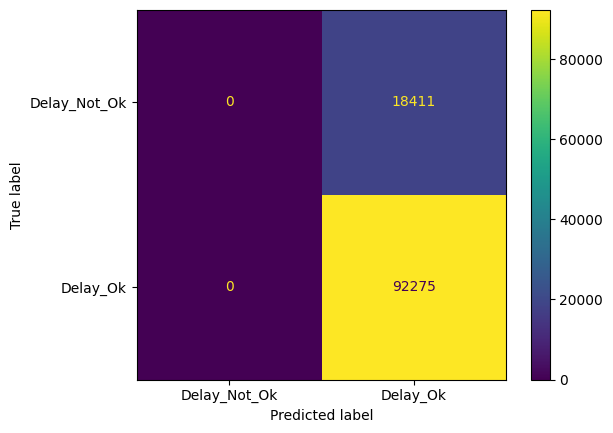

In [61]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Delay_Not_Ok', 'Delay_Ok'])

cm_display.plot()
plt.show()

In [62]:
y_pred2=classifier2.predict(X_train)

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred2))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     55169
           1       0.83      1.00      0.91    276889

    accuracy                           0.83    332058
   macro avg       0.42      0.50      0.45    332058
weighted avg       0.70      0.83      0.76    332058



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
